counting

In [ ]:
import json
from collections import Counter
import pandas as pd


with open("porsche2_location_updated.json", "r", encoding="utf-8") as f:
    data = json.load(f)

provinces = [item["location"].get("province") for item in data if item.get("location")]

province_counts = Counter(provinces)

df = pd.DataFrame(province_counts.items(), columns=["استان", "تعداد غذا"])
df = df.sort_values(by="تعداد غذا", ascending=False)


print(df)


            استان  تعداد غذا
4           گیلان        194
1  آذربایجان شرقی        108
2  آذربایجان غربی         39
0          اردبیل         33
3         کردستان         27
5           زنجان         12
6            None          5


In [3]:

no_province_items = [item["title"] for item in data if not item.get("location", {}).get("province")]


for title in no_province_items:
    print("-", title)


- چیغریتمای مرغ
- سوتی پلو
- قیساوا
- گمج کباب
- آش کشک


In [ ]:

data = [item for item in data if item.get("location", {}).get("province")]

with open("porsche2_cleaned.json", "w", encoding="utf-8") as f:
    json.dump(data, f, ensure_ascii=False, indent=2)

print(len(data))


413


In [5]:


provinces = [item["location"]["province"] for item in data]

province_counts = Counter(provinces)


df = pd.DataFrame(province_counts.items(), columns=["استان", "تعداد غذا"])
df = df.sort_values(by="تعداد غذا", ascending=False)

print(df)


            استان  تعداد غذا
4           گیلان        194
1  آذربایجان شرقی        108
2  آذربایجان غربی         39
0          اردبیل         33
3         کردستان         27
5           زنجان         12


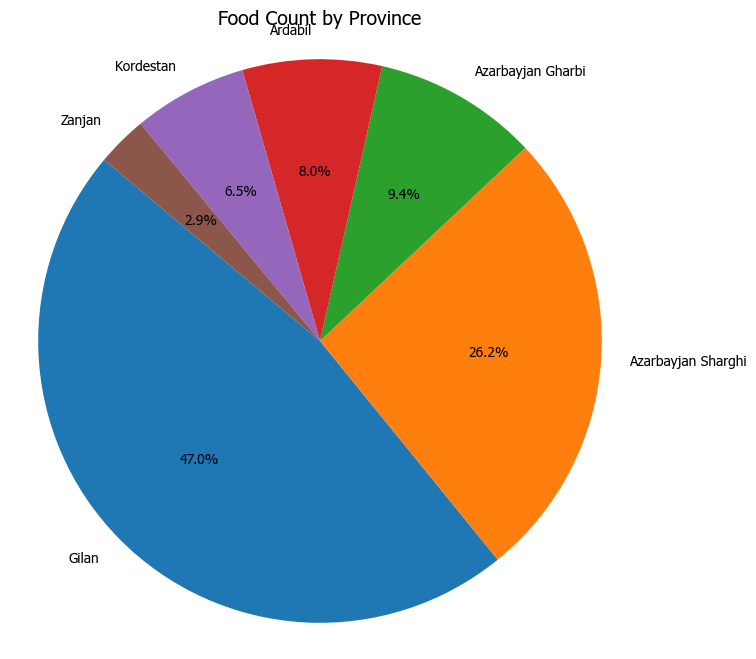

In [ ]:
import matplotlib.pyplot as plt

labels = ['Gilan', 'Azarbayjan Sharghi', 'Azarbayjan Gharbi', 'Ardabil', 'Kordestan', 'Zanjan']
values = [194, 108, 39, 33, 27, 12]

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Food Count by Province", fontsize=14)
plt.axis('equal')  

plt.show()


In [ ]:

cities = [item["location"].get("city") for item in data if item.get("location", {}).get("city")]

unique_cities = sorted(set(cities))


print(f"\nتعداد شهر منحصربه‌فرد: {len(unique_cities)}")
print("نمونه‌ای از شهرها:")
for city in unique_cities: 
    print("-", city)



تعداد شهر منحصربه‌فرد: 25
نمونه‌ای از شهرها:
- اردبیل
- ارومیه
- اورمיה
- اورمیه
- بافره
- بناب
- بیجار
- تبریز
- خلخال
- خوی
- رشت
- رضوانشهر
- رودسر
- زنجان
- سرعین
- سلماس
- سنندج
- سنندژ
- شیرز
- فومن
- مهاباد
- میانه
- نقده
- هشتجین
- گیلان


replace gilan city!

In [ ]:

for item in data:
    location = item.get("location", {})
    if location.get("city") == "گیلان":
        location["city"] = "رشت"


urmia_variants = ["اورمیه", "اورميا", "اروميه" , "اورمיה"]
standard_city_urmia = "ارومیه"

sanandaj_variants = ["سنندژ"]
standard_city_sanandaj = "سنندج"



for item in data:
    city = item.get("location", {}).get("city", "")
    if city in urmia_variants:
        item["location"]["city"] = standard_city_urmia

    if city in sanandaj_variants:
        item["location"]["city"] = standard_city_sanandaj


In [21]:

cities = [item["location"].get("city") for item in data if item.get("location", {}).get("city")]

unique_cities = sorted(set(cities))

print(len(unique_cities))
for city in unique_cities:  
    print("-", city)

21
- اردبیل
- ارومیه
- بافره
- بناب
- بیجار
- تبریز
- خلخال
- خوی
- رشت
- رضوانشهر
- رودسر
- زنجان
- سرعین
- سلماس
- سنندج
- شیرز
- فومن
- مهاباد
- میانه
- نقده
- هشتجین


In [23]:
cities = [item["location"].get("city") for item in data if item.get("location", {}).get("city")]
city_counts = Counter(cities)

city_df = pd.DataFrame(city_counts.items(), columns=["شهر", "تعداد غذا"])
city_df = city_df.sort_values(by="تعداد غذا", ascending=False)


print(city_df)

         شهر  تعداد غذا
1      تبریز         96
5        رشت         88
2     ارومیه         27
4      سنندج         27
0     اردبیل         24
13     زنجان         12
14      بناب         12
7     هشتجین          5
19     سلماس          4
3        خوی          3
9     مهاباد          3
15     میانه          1
18     رودسر          1
17      شیرز          1
16  رضوانشهر          1
10      نقده          1
12     بیجار          1
11      فومن          1
8      خلخال          1
6      سرعین          1
20     بافره          1


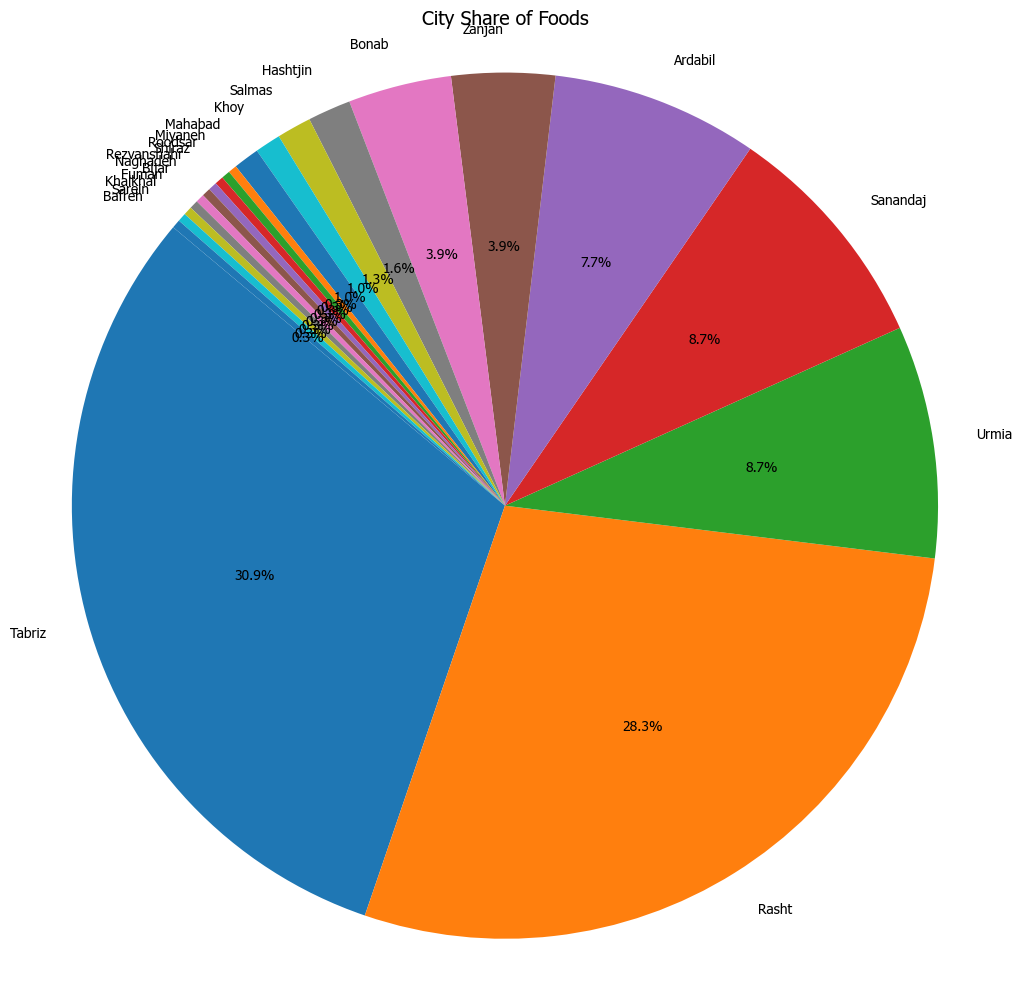

In [25]:

city_finglish = {
    "تبریز": "Tabriz",
    "رشت": "Rasht",
    "ارومیه": "Urmia",
    "سنندج": "Sanandaj",
    "اردبیل": "Ardabil",
    "زنجان": "Zanjan",
    "بناب": "Bonab",
    "هشتجین": "Hashtjin",
    "سلماس": "Salmas",
    "خوی": "Khoy",
    "مهاباد": "Mahabad",
    "میانه": "Miyaneh",
    "رودسر": "Roodsar",
    "شیرز": "Shiraz",
    "رضوانشهر": "Rezvanshahr",
    "نقده": "Naghadeh",
    "بیجار": "Bijar",
    "فومن": "Fuman",
    "خلخال": "Khalkhal",
    "سرعین": "Sarein",
    "بافره": "Bafreh"
}


labels_finglish = [city_finglish.get(city, city) for city in city_df["شهر"]]


plt.figure(figsize=(10, 10))
plt.pie(city_df["تعداد غذا"], labels=labels_finglish, autopct='%1.1f%%', startangle=140)
plt.title("City Share of Foods", fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


cordinates

In [27]:

city_coords_fixed = {
    "تبریز": (38.08, 46.2919),
    "رشت": (37.2761, 49.5886),
    "ارومیه": (37.5527, 45.076),
    "سنندج": (35.3149, 46.9988),
    "اردبیل": (38.2498, 48.2933),
    "زنجان": (36.6764, 48.4963),
    "بناب": (37.3409, 46.0504),
    "هشتجین": (37.0414, 48.4802),
    "سلماس": (38.1969, 44.7685),
    "خوی": (38.5503, 44.9547),
    "مهاباد": (36.7666, 45.7221),
    "میانه": (37.4284, 47.7058),
    "رودسر": (37.1381, 50.2927),
    "شیرز": (34.3041, 47.5837),
    "رضوانشهر": (37.5479, 49.1395),
    "نقده": (36.955, 45.3882),
    "بیجار": (35.8668, 47.6042),
    "فومن": (37.2244, 49.3121),
    "خلخال": (37.6186, 48.5261),
    "سرعین": (38.1491, 48.0733),
    "بافره": (41.5665, 35.9024)
}


for item in data:
    city = item.get("location", {}).get("city")
    if city in city_coords_fixed:
        lat, lon = city_coords_fixed[city]
        item["location"]["coordinates"] = {
            "latitude": lat,
            "longitude": lon
        }



In [29]:

with open("porsche2_with_fixed_coords.json", "w", encoding="utf-8") as f:
    json.dump(data, f, ensure_ascii=False, indent=2)


delete duplicate

In [ ]:

input_file_path = "porsche2_with_fixed_coords.json"
output_file_path = "cleaned_recipes.json"

duplicate_titles = set([
    # گیلان
    "کوکو اشپل ماهی سفید", "کوکوی اشپل", "کولی غورابیج", "رشته خوشکار", "رشته خوشکار گیلانی",
    "سیرابیج", "شامی رشتی", "خورش متنجان", "متن جن", "خورش موتن جن", "باقالا پخته",
    "شوید خولی", "غورآبه", "خورش غورابه", "مرغانه پلا", "کباب ترش مخصوص", "ترش کباب",
    "خورش ترشه تره", "ترش تره", "بادمجان شکم پر", "فسنجون قلقلی با جعفری", "فسنجان با کوفته قل‌قلی",
    "ماهی فسنجان", "خورش لوبیا فسنجان", "باقالا فسنجان", "فسنجان ماهی", "خورش جوجه پریده",
    "گیجاواش", "گیجاواش تره", "ماهی شکم پر شمالی", "ماهی سفید شکم پر", "ماهی فویج شکم پر",
    "کویی تره", "خورش جغرتمه", "چخرتمه بادکوبه‌ای", "شیرین قورمه", "خورش انار مسما",
    "خورش آلو مسما", "لونگی", "کویی خورش", "خورش شش انداز گیلانی", "سیر قلیه گیلانی", "سیرقلیه",

    # آذربایجان غربی
    "آش برگ مو", "آش بلغور ارومیه", "حلوای هویج", "خورش ارومیه", "گوزلمه",
    "گزلمه", "شورجه ارومیه", "ییرتیخلی",

    # آذربایجان شرقی
    "آش شیله عدس", "آش گوشواره", "آش کلم برگ تبریز", "خشیل", "راحت الحلقوم",
    "خورشت هویج با گوشت", "شیرپلوی تبریزی", "لوبیا پلوی تبریزی", "کوفته تبریزی",
    "کوفته تبریزی", "کوکوی لوبیا سبز", "قیقیناق", "قارنی یاریخ - بادمجان شکم پرتبریزی"

    #کردستان

    #زنجان

    #اردبیل
])

with open(input_file_path, "r", encoding="utf-8") as file:
    all_recipes = json.load(file)

cleaned_recipes = []
for recipe in all_recipes:
    title = recipe.get("title", "").strip()
    if title in duplicate_titles:
        duplicate_titles.remove(title)
        continue  
    cleaned_recipes.append(recipe)

with open(output_file_path, "w", encoding="utf-8") as outfile:
    json.dump(cleaned_recipes, outfile, ensure_ascii=False, indent=2)

# گزارش نهایی
print(len(all_recipes) - len(cleaned_recipes))
print(len(cleaned_recipes),output_file_path)


60
353 cleaned_recipes.json


In [35]:


with open("cleaned_recipes.json", "r", encoding="utf-8") as f:
    data = json.load(f)

provinces = [item["location"].get("province") for item in data if item.get("location")]

province_counts = Counter(provinces)

df = pd.DataFrame(province_counts.items(), columns=["استان", "تعداد غذا"])
df = df.sort_values(by="تعداد غذا", ascending=False)


print(df)


            استان  تعداد غذا
4           گیلان        154
2  آذربایجان شرقی         96
0          اردبیل         33
1  آذربایجان غربی         31
3         کردستان         27
5           زنجان         12


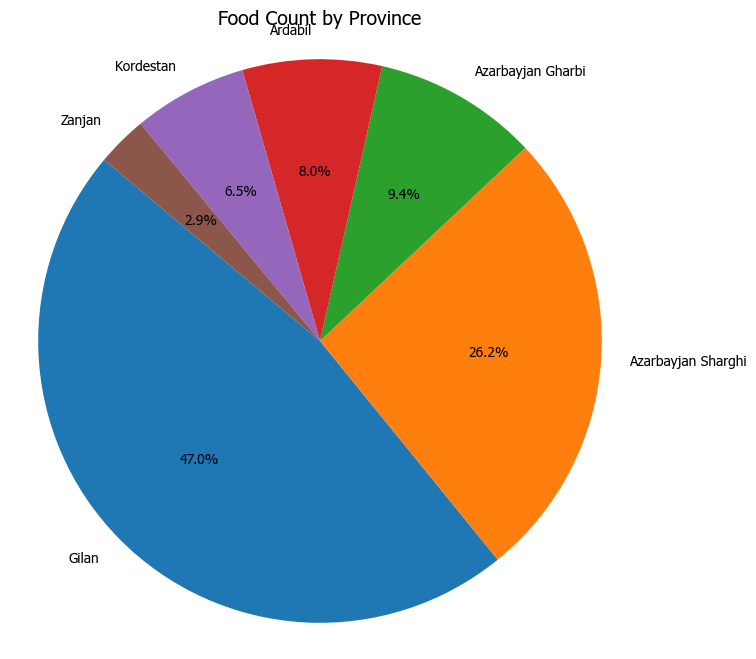

In [38]:
import matplotlib.pyplot as plt

labels = ['Gilan', 'Azarbayjan Sharghi', 'Azarbayjan Gharbi', 'Ardabil', 'Kordestan', 'Zanjan']
values = [194, 108, 39, 33, 27, 12]

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Food Count by Province", fontsize=14)
plt.axis('equal')  

plt.show()


In [39]:

cities = [item["location"].get("city") for item in data if item.get("location", {}).get("city")]

unique_cities = sorted(set(cities))


print(f"\nتعداد شهر منحصربه‌فرد: {len(unique_cities)}")
print("نمونه‌ای از شهرها:")
for city in unique_cities: 
    print("-", city)



تعداد شهر منحصربه‌فرد: 21
نمونه‌ای از شهرها:
- اردبیل
- ارومیه
- بافره
- بناب
- بیجار
- تبریز
- خلخال
- خوی
- رشت
- رضوانشهر
- رودسر
- زنجان
- سرعین
- سلماس
- سنندج
- شیرز
- فومن
- مهاباد
- میانه
- نقده
- هشتجین


In [40]:
cities = [item["location"].get("city") for item in data if item.get("location", {}).get("city")]
city_counts = Counter(cities)

city_df = pd.DataFrame(city_counts.items(), columns=["شهر", "تعداد غذا"])
city_df = city_df.sort_values(by="تعداد غذا", ascending=False)


print(city_df)

         شهر  تعداد غذا
2      تبریز         84
5        رشت         67
4      سنندج         27
0     اردبیل         24
1     ارومیه         20
13     زنجان         12
14      بناب         12
7     هشتجین          5
3        خوی          3
19     سلماس          3
9     مهاباد          3
15     میانه          1
18     رودسر          1
17      شیرز          1
16  رضوانشهر          1
10      نقده          1
12     بیجار          1
11      فومن          1
8      خلخال          1
6      سرعین          1
20     بافره          1


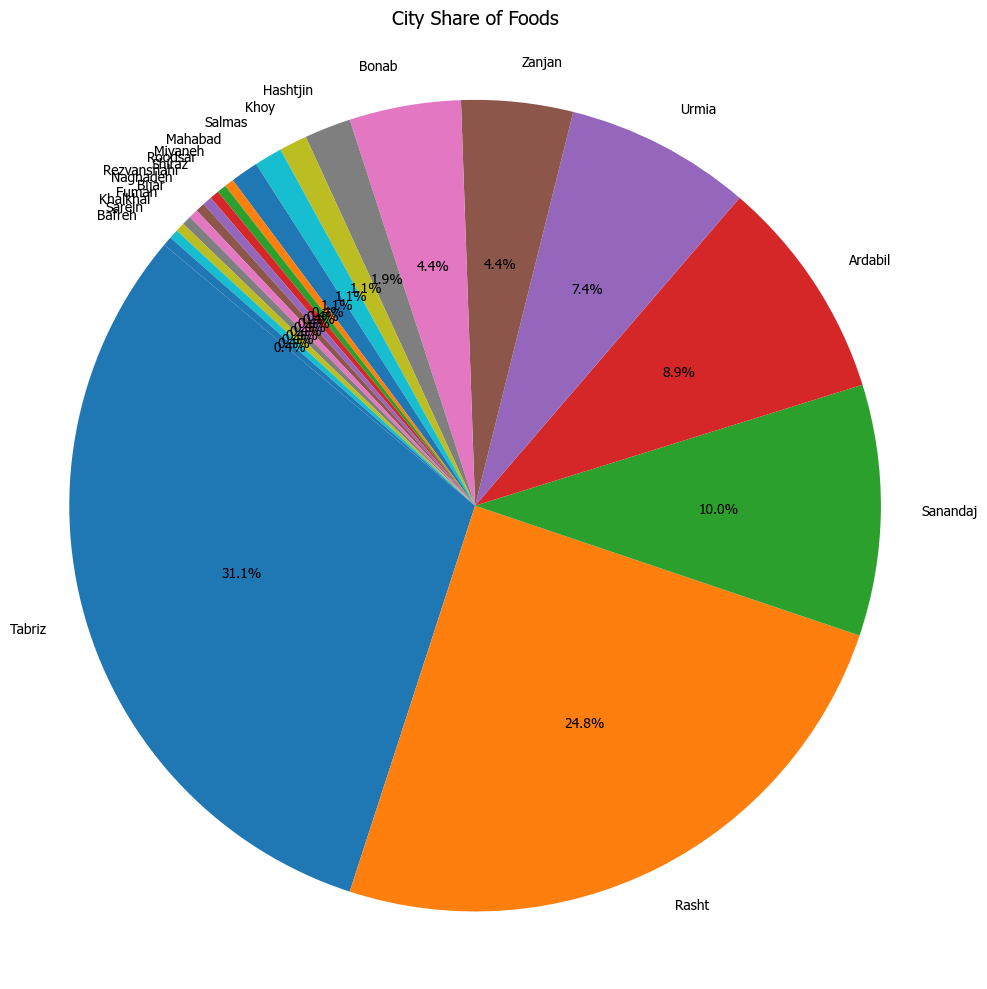

In [41]:

city_finglish = {
    "تبریز": "Tabriz",
    "رشت": "Rasht",
    "ارومیه": "Urmia",
    "سنندج": "Sanandaj",
    "اردبیل": "Ardabil",
    "زنجان": "Zanjan",
    "بناب": "Bonab",
    "هشتجین": "Hashtjin",
    "سلماس": "Salmas",
    "خوی": "Khoy",
    "مهاباد": "Mahabad",
    "میانه": "Miyaneh",
    "رودسر": "Roodsar",
    "شیرز": "Shiraz",
    "رضوانشهر": "Rezvanshahr",
    "نقده": "Naghadeh",
    "بیجار": "Bijar",
    "فومن": "Fuman",
    "خلخال": "Khalkhal",
    "سرعین": "Sarein",
    "بافره": "Bafreh"
}


labels_finglish = [city_finglish.get(city, city) for city in city_df["شهر"]]


plt.figure(figsize=(10, 10))
plt.pie(city_df["تعداد غذا"], labels=labels_finglish, autopct='%1.1f%%', startangle=140)
plt.title("City Share of Foods", fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()
